# AR(1) Model



## The Gibbs sampler

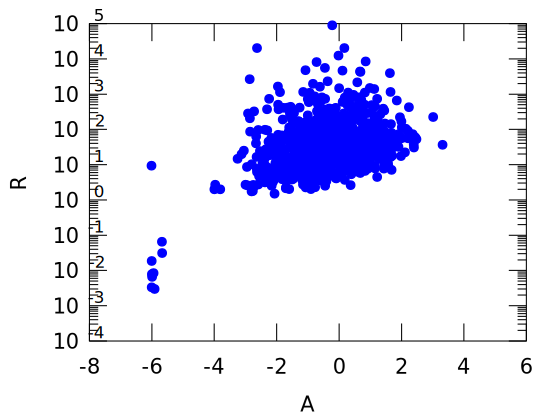

In [2]:
nu = 0.4; beta = 100; 
nu_beta = nu/beta;  P = 1.2; x_0 = 1; x_1 = -6;
T = 1000;
R = zeros(1, T);
A = zeros(1, T); A(1) = -6; R(1) = 0.00001;

for t=2:T,
    Sig = 1/(1/P + x_0^2*(1/R(t-1)));
    mu = Sig*x_0*x_1*(1/R(t-1));
    A(t) = sqrt(Sig)*randn + mu;

    b = 0.5*(x_1.^2 - 2*x_1*x_0*A(t) + x_0.^2*A(t).^2) + nu_beta;
    R(t) = 1/(gamrnd(nu+0.5, 1/b));
end;

semilogy(A, R, '.');

set(gca, 'xlim', [-8 6])
set(gca, 'ylim', [10^(-4) 10^(5)])

xlabel('A')
ylabel('R')

## VB

In [3]:
nu = 0.4; beta = 100; 
nu_beta = nu/beta;  P = 1.2; x_0 = 1; x_1 = -6;
T = 300;
E_A = -6; 
E_A2 = E_A^2;
E_invR = 1/0.00001;

for t=2:T,
    Sig = 1/(1/P + x_0^2*E_invR);
    mu = Sig*x_0*x_1*E_invR;

    E_A = mu;
    E_A2 = mu.^2 + Sig; 
    
    a = nu+0.5;
    b = 0.5*(x_1.^2 - 2*x_1*x_0*E_A + x_0.^2*E_A2) + nu_beta;

    E_invR = a/b;
end;

E_A
E_invR

E_A = -0.37043
E_invR =  0.054835
